In [1]:
import repodepo as rd
from repodepo.getters import project_getters,user_getters
from matplotlib import pyplot as plt
import pandas as pd
import os
import glob

In [2]:

db_name = os.path.basename(glob.glob('../dumps/sqlite/*.db')[0])[:-3]
conninfo = dict(
    db_name = db_name,
    db_type = 'sqlite',
    db_folder = '../dumps/sqlite/',
)

db = rd.repo_database.Database(**conninfo)



## Diverse measures over time on the whole dataset

The following measures are plotted, for a time resolution defined in the cell below:
 - number of commits
 - number of new developers
 - number of active developers
 - number of new projects/repositories
 - number of active projects/repositories
 - number of downloads
 - number of stars
 - number of forks
 - number of sponsorships
 - cumulative number of developers
 - cumulative number of projects/repositories


## Rust language usage

At the end of the notebook one can also find two plots about the importance of Rust in repositories and users:
 - Rust usage share by the developers of the dataset
 - Rust share of repositories.

In [3]:
kwargs = dict(time_window='week',cumulative=False,end_date='2022-03-14')
kwargs_cumul = dict(time_window='week',cumulative=True,end_date='2022-03-14')


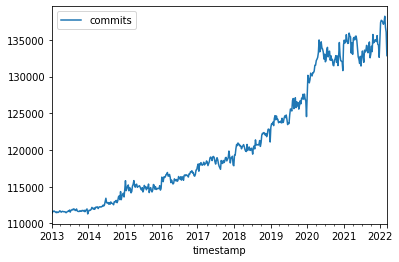

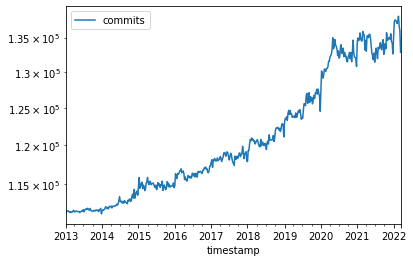

In [4]:
df = project_getters.Commits(db=db).get_result(**kwargs)
df.plot()
plt.show()

df.plot()
plt.yscale('log')
plt.show()

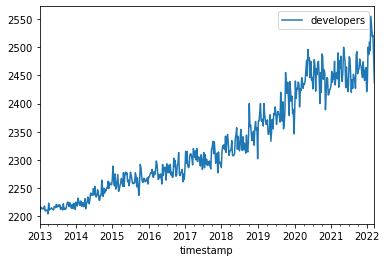

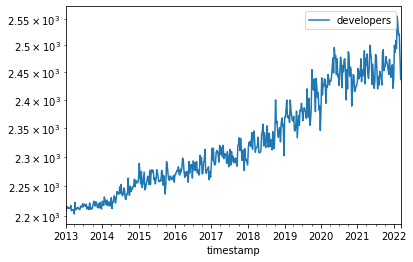

In [5]:

df = project_getters.Developers(db=db).get_result(**kwargs)
df.plot()
plt.show()

df.plot()
plt.yscale('log')
plt.show()

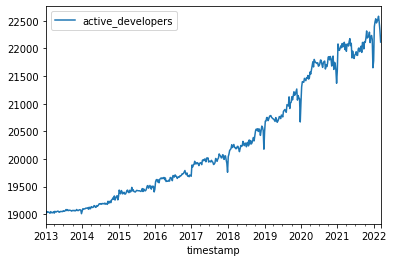

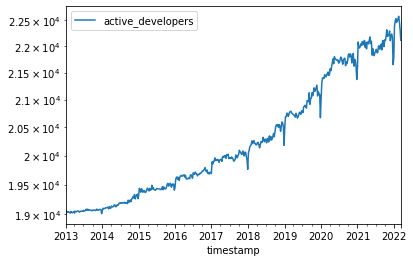

In [6]:

df = project_getters.ActiveDevelopers(db=db).get_result(**kwargs)
df.plot()
plt.show()

df.plot()
plt.yscale('log')
plt.show()

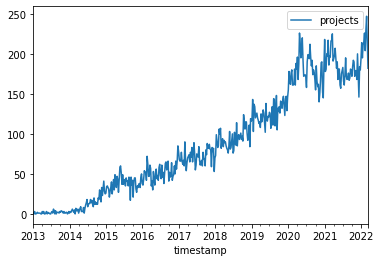

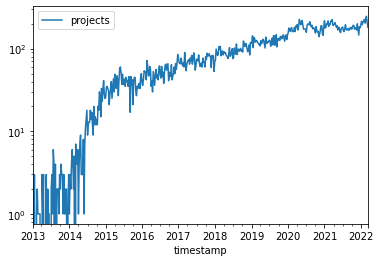

In [7]:

df = user_getters.Projects(db=db).get_result(**kwargs)
df.plot()
plt.show()

df.plot()
plt.yscale('log')
plt.show()

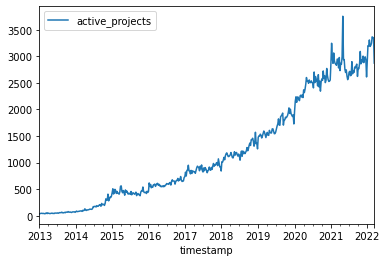

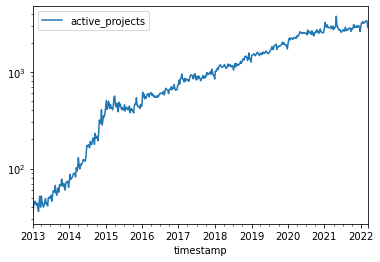

In [8]:

df = user_getters.ActiveProjects(db=db).get_result(**kwargs)
df.plot()
plt.show()

df.plot()
plt.yscale('log')
plt.show()

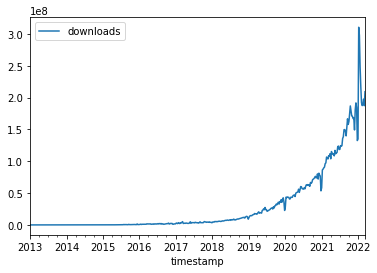

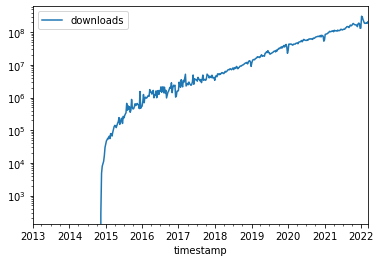

In [9]:
df = project_getters.Downloads(db=db).get_result(**kwargs)
df.plot()
plt.show()

df.plot()
plt.yscale('log')
plt.show()

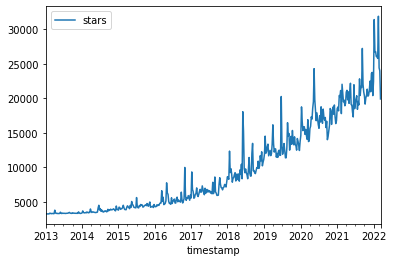

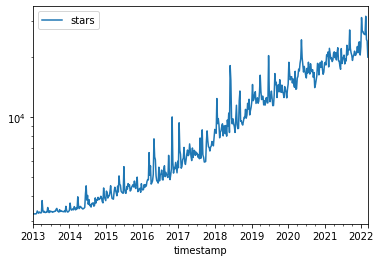

In [10]:
df = project_getters.Stars(db=db).get_result(**kwargs)
df.plot()
plt.show()

df.plot()
plt.yscale('log')
plt.show()

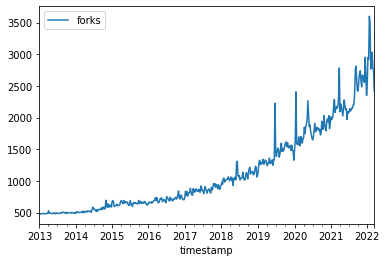

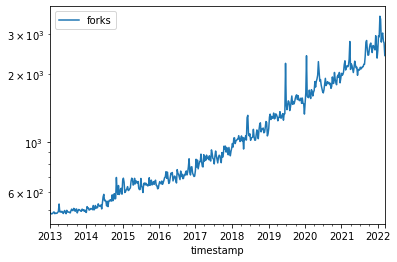

In [11]:
df = project_getters.Forks(db=db).get_result(**kwargs)
df.plot()
plt.show()

df.plot()
plt.yscale('log')
plt.show()

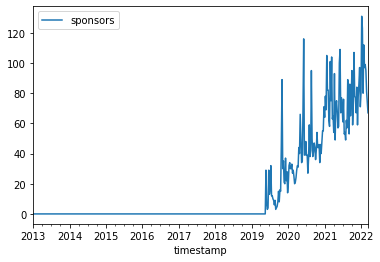

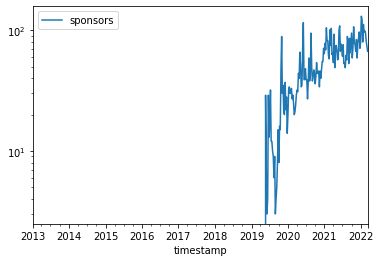

In [12]:
df = user_getters.Sponsors(db=db).get_result(**kwargs)
df.plot()
plt.show()

df.plot()
plt.yscale('log')
plt.show()

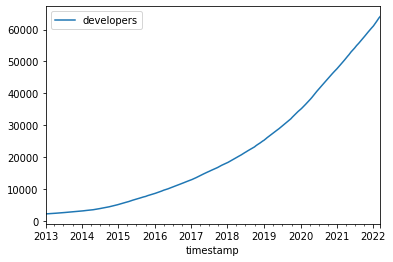

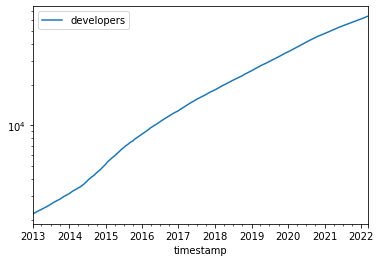

In [13]:

df = project_getters.Developers(db=db).get_result(**kwargs_cumul)
df.plot()
plt.show()

df.plot()
plt.yscale('log')
plt.show()

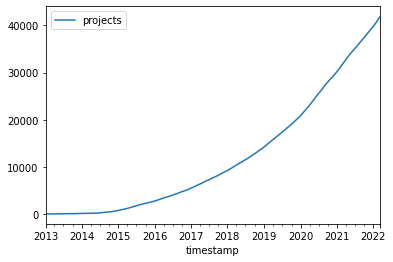

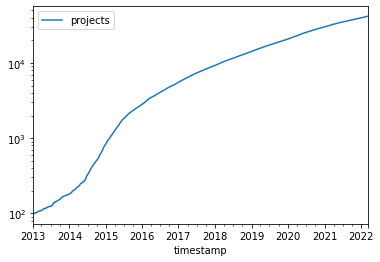

In [14]:

df = user_getters.Projects(db=db).get_result(**kwargs_cumul)
df.plot()
plt.show()

df.plot()
plt.yscale('log')
plt.show()

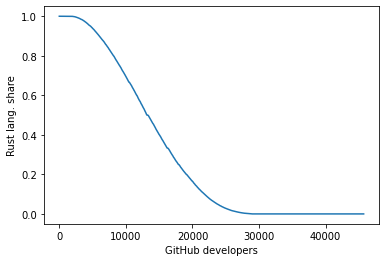

In [15]:
user_df = pd.read_sql('''
SELECT user_identity,SUM(CASE WHEN language='Rust' THEN share ELSE 0. END) AS rust_share  FROM user_languages ul 
GROUP BY user_identity 
ORDER BY rust_share DESC
;''',con=db.connection)

user_df['rust_share'].plot()
plt.ylabel('Rust lang. share')
plt.xlabel('GitHub developers')
plt.show()

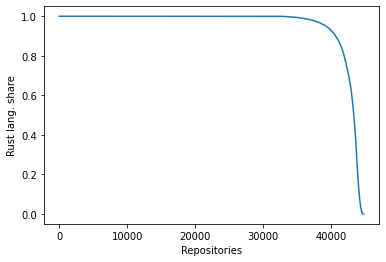

In [16]:
repo_df = pd.read_sql('''
SELECT repo_id,SUM(CASE WHEN language='Rust' THEN share ELSE 0. END) AS rust_share  FROM repo_languages 
GROUP BY repo_id
ORDER BY rust_share DESC
;''',con=db.connection)

repo_df['rust_share'].plot()
plt.ylabel('Rust lang. share')
plt.xlabel('Repositories')
plt.show()